In [98]:
import polars as pl
import numpy as np
import statsmodels.formula.api as smf
from marginaleffects import *

mtcars = pl.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/datasets/mtcars.csv")

mod = smf.ols("mpg ~ hp * wt * am", data = mtcars).fit()

In [3]:
pre = predictions(mod)

mtcars.shape

E:\Users\Gamer\anaconda3\envs\test_tensorflow_install\lib\site-packages\marginaleffects\uncertainty.py:67: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.


(32, 12)

In [4]:
print(pre)

shape: (32, 7)
┌──────────┬───────────┬──────┬──────────┬─────┬──────┬───────┐
│ Estimate ┆ Std.Error ┆ z    ┆ P(>|z|)  ┆ S   ┆ 2.5% ┆ 97.5% │
│ ---      ┆ ---       ┆ ---  ┆ ---      ┆ --- ┆ ---  ┆ ---   │
│ str      ┆ str       ┆ str  ┆ str      ┆ str ┆ str  ┆ str   │
╞══════════╪═══════════╪══════╪══════════╪═════╪══════╪═══════╡
│ 22.5     ┆ 0.884     ┆ 25.4 ┆ 0        ┆ inf ┆ 20.8 ┆ 24.2  │
│ 20.8     ┆ 1.19      ┆ 17.4 ┆ 0        ┆ inf ┆ 18.5 ┆ 23.1  │
│ 25.3     ┆ 0.709     ┆ 35.7 ┆ 0        ┆ inf ┆ 23.9 ┆ 26.7  │
│ 20.3     ┆ 0.704     ┆ 28.8 ┆ 0        ┆ inf ┆ 18.9 ┆ 21.6  │
│ 17       ┆ 0.712     ┆ 23.9 ┆ 0        ┆ inf ┆ 15.6 ┆ 18.4  │
│ …        ┆ …         ┆ …    ┆ …        ┆ …   ┆ …    ┆ …     │
│ 29.6     ┆ 1.87      ┆ 15.8 ┆ 0        ┆ inf ┆ 25.9 ┆ 33.3  │
│ 15.9     ┆ 1.31      ┆ 12.1 ┆ 0        ┆ inf ┆ 13.3 ┆ 18.5  │
│ 19.4     ┆ 1.15      ┆ 16.9 ┆ 0        ┆ inf ┆ 17.2 ┆ 21.7  │
│ 14.8     ┆ 2.02      ┆ 7.33 ┆ 2.29e-13 ┆ 42  ┆ 10.8 ┆ 18.7  │
│ 21.5     ┆ 1.07      ┆ 

E:\Users\Gamer\anaconda3\envs\test_tensorflow_install\lib\site-packages\marginaleffects\classes.py:83: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
E:\Users\Gamer\anaconda3\envs\test_tensorflow_install\lib\site-packages\marginaleffects\classes.py:83: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
E:\Users\Gamer\anaconda3\envs\test_tensorflow_install\lib\site-packages\marginaleffects\classes.py:83: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
E:\Users\Gamer\anaconda3\envs\test_tensorflow_install\lib\site-packages\marginaleffects\classes.py:83: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `retur

In [5]:
cmp = comparisons(mod)

cmp.shape

TypeError: cannot call `map_groups` when grouping by an expression

In [6]:
cmp = comparisons(mod, variables = {"hp": [120, 100]})
print(cmp)

TypeError: cannot call `map_groups` when grouping by an expression

In [7]:
cmp = comparisons(
  mod,
  variables = {"hp": 50},
  comparison = "ratioavg")
print(cmp)

TypeError: cannot call `map_groups` when grouping by an expression

In [8]:
mfx = slopes(mod)

mfx.shape

TypeError: cannot call `map_groups` when grouping by an expression

In [9]:
p = predictions(mod, newdata = "mean")
print(p)

shape: (1, 7)
┌──────────┬───────────┬──────┬─────────┬─────┬──────┬───────┐
│ Estimate ┆ Std.Error ┆ z    ┆ P(>|z|) ┆ S   ┆ 2.5% ┆ 97.5% │
│ ---      ┆ ---       ┆ ---  ┆ ---     ┆ --- ┆ ---  ┆ ---   │
│ str      ┆ str       ┆ str  ┆ str     ┆ str ┆ str  ┆ str   │
╞══════════╪═══════════╪══════╪═════════╪═════╪══════╪═══════╡
│ 17.5     ┆ 0.83      ┆ 21.1 ┆ 0       ┆ inf ┆ 15.9 ┆ 19.1  │
└──────────┴───────────┴──────┴─────────┴─────┴──────┴───────┘

Columns: rowid, estimate, std_error, statistic, p_value, s_value, conf_low, conf_high, rownames, mpg, cyl, disp, hp, drat, wt, qsec, vs, am, gear, carb



E:\Users\Gamer\anaconda3\envs\test_tensorflow_install\lib\site-packages\marginaleffects\uncertainty.py:67: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
E:\Users\Gamer\anaconda3\envs\test_tensorflow_install\lib\site-packages\marginaleffects\classes.py:83: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
E:\Users\Gamer\anaconda3\envs\test_tensorflow_install\lib\site-packages\marginaleffects\classes.py:83: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
E:\Users\Gamer\anaconda3\envs\test_tensorflow_install\lib\site-packages\marginaleffects\classes.py:83: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `r

E:\Users\Gamer\anaconda3\envs\test_tensorflow_install\lib\site-packages\marginaleffects\uncertainty.py:67: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.


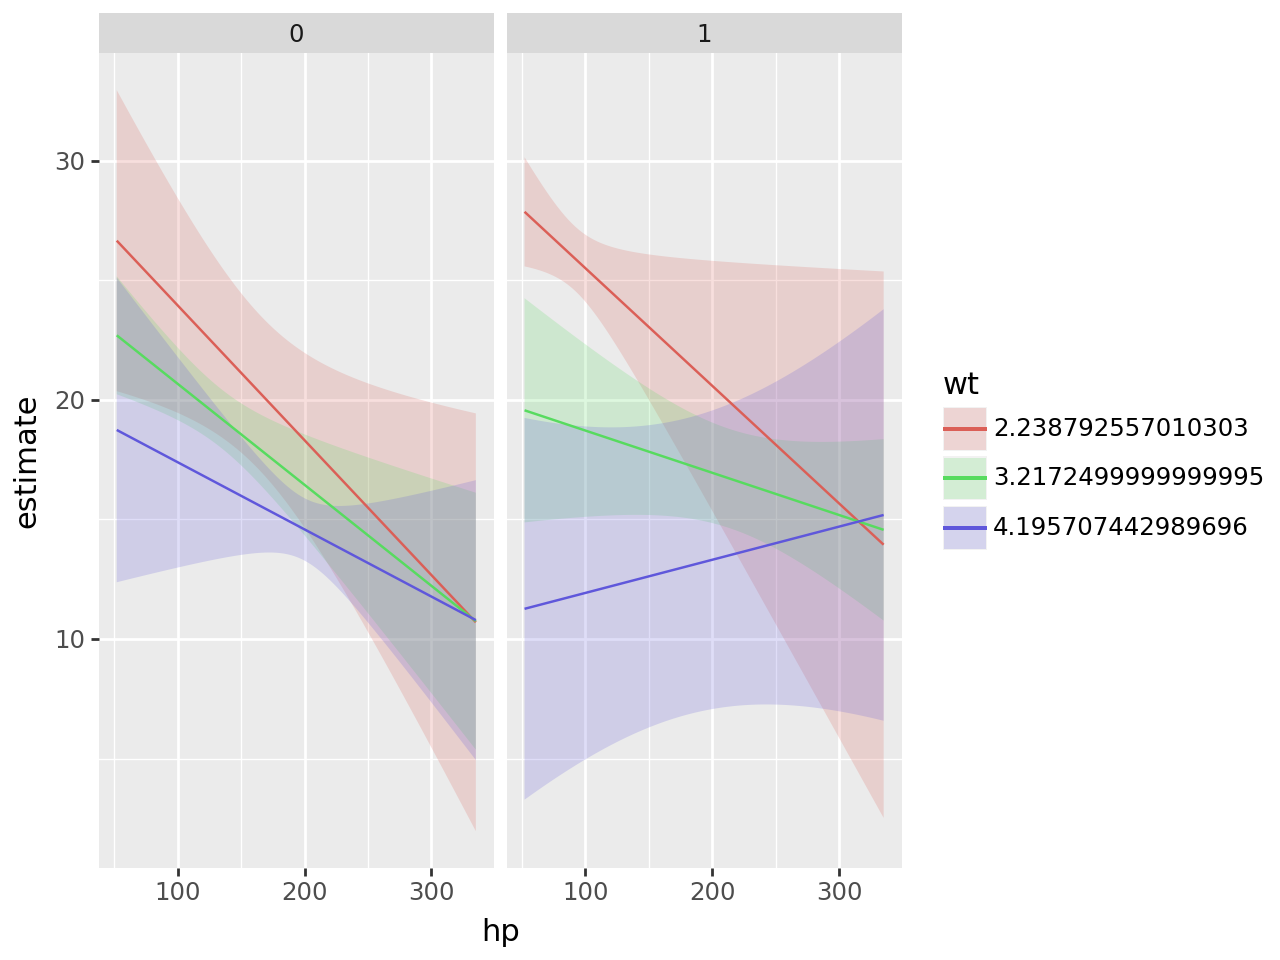

In [10]:
cond = {
  "hp": None,
  "wt": [mtcars["wt"].mean() - mtcars["wt"].std(),
         mtcars["wt"].mean(),
         mtcars["wt"].mean() + mtcars["wt"].std()],
  "am": None
}
plot_predictions(mod, condition = cond)

In [11]:
plot_slopes(mod,
  variables = "am",
  condition = {"hp": None, "wt": [mtcars["wt"].min(), mtcars["wt"].max()]}
)

TypeError: cannot call `map_groups` when grouping by an expression

In [17]:
from sklearn.datasets import load_boston
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.inspection import partial_dependence
from sklearn.utils import resample
from scipy.stats import sem
import numpy as np
from statsmodels.graphics.regressionplots import plot_partregress

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [18]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [27]:
boston_data = housing
X = pd.DataFrame(data, columns=["CRIM","SN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"])
y = target

In [30]:
X

,CRIM,SN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [28]:
mse_linear_model = -cross_val_score(LinearRegression(), X, y, cv=100, scoring='neg_root_mean_squared_error')
mse_rf_model = -cross_val_score(RandomForestRegressor(n_estimators=100), X, y, cv=100, scoring='neg_root_mean_squared_error')
mse_reduction = mse_rf_model - mse_linear_model

print('Average MSE for linear regression is {0:.3f}'.format(np.mean(mse_linear_model)))
print('Average MSE for random forest is {0:.3f}'.format(np.mean(mse_rf_model)))
print('Switching to a Random Forest over a linear regression reduces MSE on average by {0:.3f} ± {1:.3f}'.format(np.mean(mse_reduction), 3*sem(mse_reduction)))

Average MSE for linear regression is 4.184
Average MSE for random forest is 3.019
Switching to a Random Forest over a linear regression reduces MSE on average by -1.165 ± 0.520


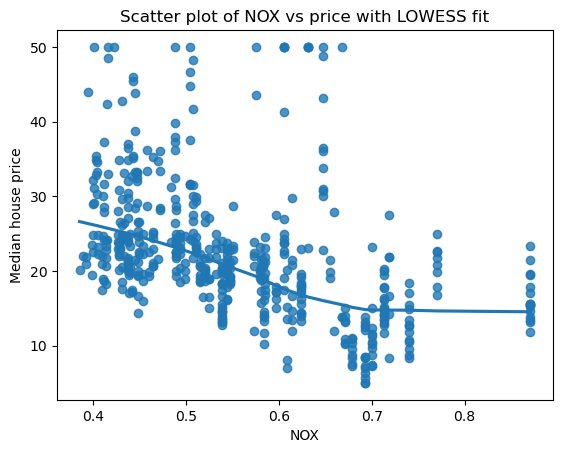

In [32]:
sns.regplot(x=X['NOX'], y=y, lowess=True)
plt.ylabel('Median house price')
plt.xlabel('NOX')
plt.title('Scatter plot of NOX vs price with LOWESS fit')
plt.show()

In [33]:
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              891.3
Date:                Sun, 14 Apr 2024   Prob (F-statistic):                        0.00
Time:                        15:20:58   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3074.
Df Residuals:                     493   BIC:                                      3128.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0929      0.034     -2.699      0.007      -0.161      -0.025
SN             0.0487      0.014      3.382      0.001       0.020       0.077
INDUS         -0.0041      0.064     -0.063      0.950      -0.131       0.123
CHAS           2.8540      0.904      3.157      0.002       1.078       4.630
NOX           -2.8684      3.359     -0.854      0.394      -9.468       3.731
RM             5.9281      0.309     19.178      0.000       5.321       6.535
AGE           -0.0073      0.014     -0.526      0.599      -0.034       0.020
DIS           -0.9685      0.196     -4.951      0.000      -1.353      -0.584
RAD            0.1712      0.067      2.564      0.011       0.040       0.302
TAX           -0.0094      0.004     -2.395      0.017      -0.017      -0.002
PTRATIO       -0.3922      0.110     -3.570      0.000      -0.608      -0.176
B              0.0149      0.003      5.528      0.000       0.010       0.020
LSTAT         -0.4163      0.051     -8.197      0.000      -0.516      -0.317
==============================================================================
Omnibus:                      204.082   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1374.225
Skew:                           1.609   Prob(JB):                    3.90e-299
Kurtosis:                      10.404   Cond. No.                     8.50e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

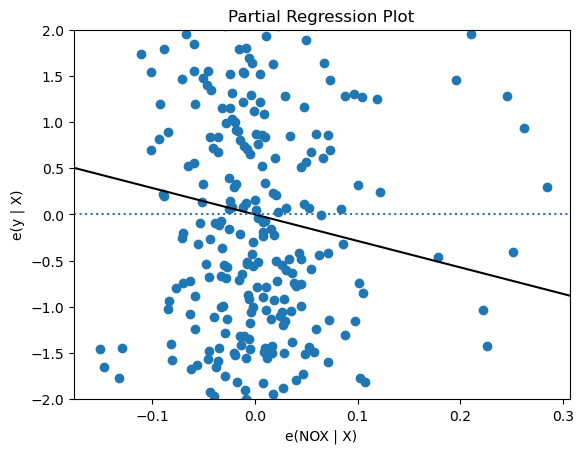

In [34]:
plot_partregress(y, X['NOX'], X.drop('NOX', axis=1), obs_labels=False)
plt.axhline(0, linestyle='dotted')
plt.ylim(-2, 2)
plt.show()

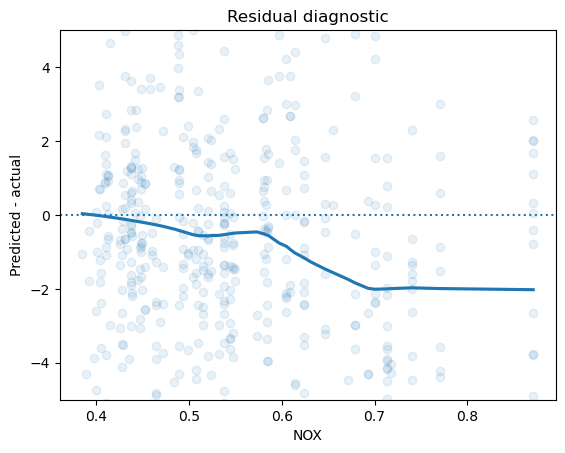

In [37]:
sns.regplot(x=X['NOX'], 
            y=sm.OLS(y, X).fit().resid, 
            lowess=True, 
            scatter_kws={'alpha': .1})
plt.axhline(0, linestyle='dotted')
plt.title('Residual diagnostic')
plt.xlabel('NOX')
plt.ylabel('Predicted - actual')
plt.ylim(-5, 5)
plt.show()

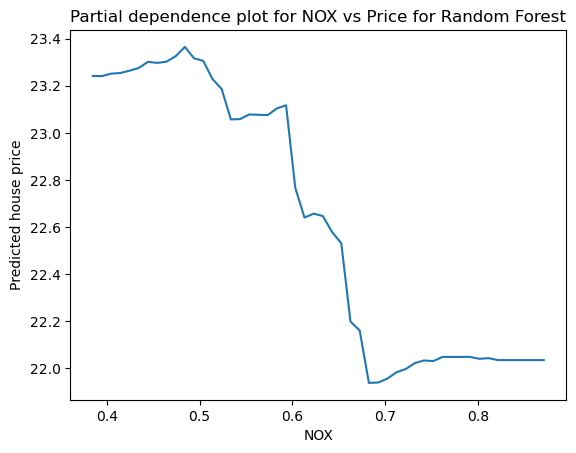

In [38]:
rf_model = RandomForestRegressor(n_estimators=100).fit(X, y)

nox_values = np.linspace(np.min(X['NOX']), np.max(X['NOX']))

pdp_values = []
for n in nox_values:
  X_pdp = X.copy()
  X_pdp['NOX'] = n
  pdp_values.append(np.mean(rf_model.predict(X_pdp)))

plt.plot(nox_values, pdp_values)
plt.ylabel('Predicted house price')
plt.xlabel('NOX')
plt.title('Partial dependence plot for NOX vs Price for Random Forest')
plt.show()

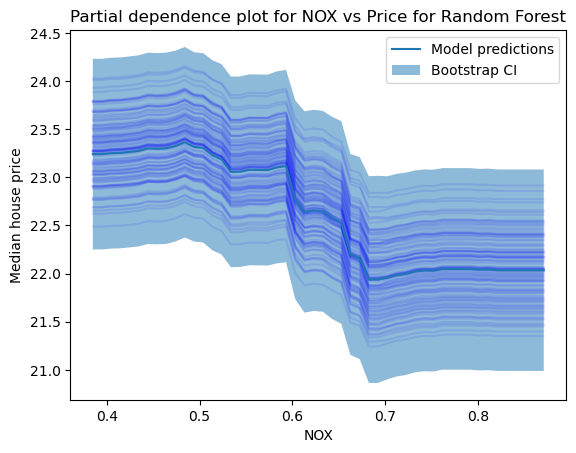

In [39]:
n_bootstrap = 100

nox_values = np.linspace(np.min(X['NOX']), np.max(X['NOX']))

expected_value_bootstrap_replications = []

for _ in range(n_bootstrap):
    X_boot, y_boot = resample(X, y)
    rf_model_boot = RandomForestRegressor(n_estimators=100).fit(X_boot, y_boot)
    
    bootstrap_model_predictions = []
    for n in nox_values:
        X_pdp = X_boot.copy()
        X_pdp['NOX'] = n
        bootstrap_model_predictions.append(np.mean(rf_model.predict(X_pdp)))
    expected_value_bootstrap_replications.append(bootstrap_model_predictions)
    
expected_value_bootstrap_replications = np.array(expected_value_bootstrap_replications)
for ev in expected_value_bootstrap_replications:
    plt.plot(nox_values, ev, color='blue', alpha=.1)

prediction_se = np.std(expected_value_bootstrap_replications, axis=0)

plt.plot(nox_values, pdp_values, label='Model predictions')
plt.fill_between(nox_values, pdp_values - 3*prediction_se, pdp_values + 3*prediction_se, alpha=.5, label='Bootstrap CI')
plt.legend()
plt.ylabel('Median house price')
plt.xlabel('NOX')
plt.title('Partial dependence plot for NOX vs Price for Random Forest')
plt.show()

C:\Users\Gamer\AppData\Local\Temp\ipykernel_22396\3269768422.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

E:\Users\Gamer\anaconda3\envs\test_tensorflow_install\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\Gamer\AppData\Local\Temp\ipykernel_22396\3269768422.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms

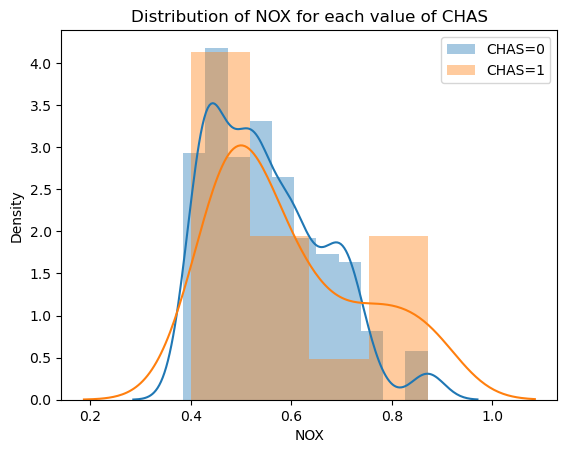

In [40]:
sns.distplot(X[X['CHAS'] == 0]['NOX'], label='CHAS=0')
sns.distplot(X[X['CHAS'] == 1]['NOX'], label='CHAS=1')
plt.title('Distribution of NOX for each value of CHAS')
plt.legend()
plt.show()

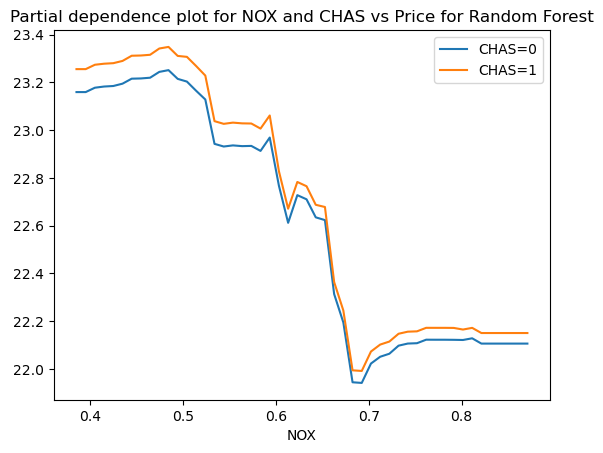

In [41]:
rf_model = RandomForestRegressor(n_estimators=100).fit(X, y)

nox_values = np.linspace(np.min(X['NOX']), np.max(X['NOX']))
chas_values = [0, 1]

pdp_values = []
for n in nox_values:
  X_pdp = X.copy()
  X_pdp['CHAS'] = 0
  X_pdp['NOX'] = n
  pdp_values.append(np.mean(rf_model.predict(X_pdp)))
plt.plot(nox_values, pdp_values, label='CHAS=0')

pdp_values = []
for n in nox_values:
  X_pdp = X.copy()
  X_pdp['CHAS'] = 1
  X_pdp['NOX'] = n
  pdp_values.append(np.mean(rf_model.predict(X_pdp)))
plt.plot(nox_values, pdp_values, label='CHAS=1')

plt.legend()

plt.xlabel('NOX')
plt.title('Partial dependence plot for NOX and CHAS vs Price for Random Forest')
plt.show()

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay

In [43]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)
X = X.drop(columns=["Latitude", "Longitude"])
X["AveRooms"] = np.where(X["AveRooms"]<7, 0, 1)
X["AveBedrms"] = np.where(X["AveBedrms"]<7, 0, 1)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [45]:
rf = RandomForestRegressor(
    criterion="squared_error",
    n_estimators=25,
    max_depth=3,
    random_state=3,
)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=25, random_state=3)

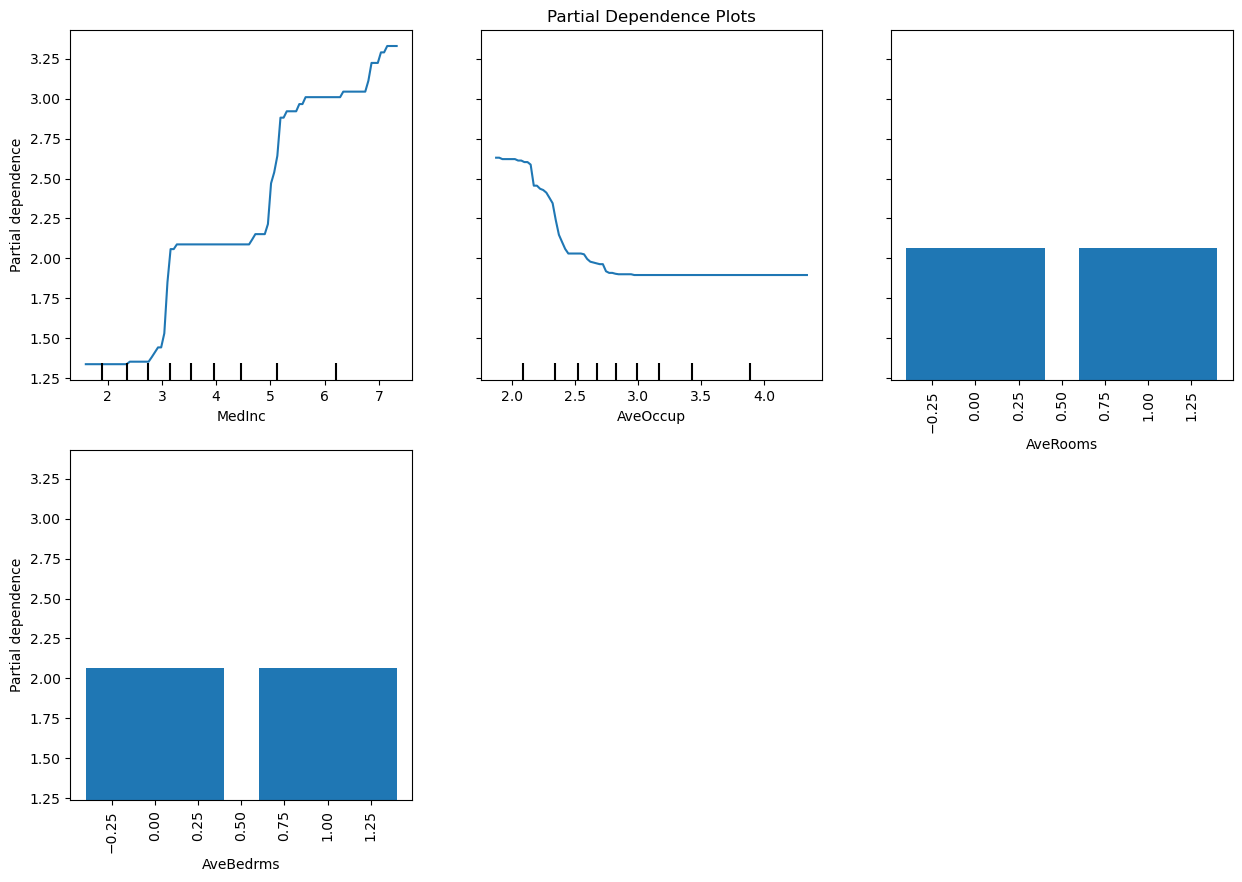

In [46]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Partial Dependence Plots")
PartialDependenceDisplay.from_estimator(
    estimator=rf,
    X=X_test,
    features=(0, 5, 2, 3), # the features to plot
    categorical_features = (2, 3), # categorical features
    random_state=5,
    ax=ax,
)
plt.show()

In [50]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
# from feature_engine.encoding import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from pdpbox import pdp

In [80]:
data = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl')
data = data.replace('?', np.nan)
def get_first_cabin(row):
    try:
        return row.split()[0]
    except:
        return np.nan
data['cabin'] = data['cabin'].apply(get_first_cabin)
data["cabin"] = data["cabin"].str[0]
data.loc[data["cabin"] == "T", "cabin"] = "G"
data.fillna({
    "cabin":"M",
    "embarked": "S",
}, inplace=True)
data[['pclass', 'sibsp', 'parch']] = data[['pclass', 'sibsp', 'parch']].astype(int)
data['fare'] = data['fare'].astype(float)
data['fare'] = data['fare'].fillna(data['fare'].median())
usecols = ["pclass", "sibsp", "parch", "sex", "fare", "embarked", "cabin", "survived", ]
data = data[usecols]
# data = OneHotEncoder(drop_last='if_binary').fit_transform(data)
col_names = OneHotEncoder(drop='if_binary',sparse_output=False).fit(data).get_feature_names_out()
data = pd.DataFrame(OneHotEncoder(drop='if_binary',sparse_output=False).fit_transform(data),columns =col_names)
X = data.drop(columns='survived_1')
y = data['survived_1']

In [84]:
col_names

array(['pclass_1', 'pclass_2', 'pclass_3', 'sibsp_0', 'sibsp_1',
       'sibsp_2', 'sibsp_3', 'sibsp_4', 'sibsp_5', 'sibsp_8', 'parch_0',
       'parch_1', 'parch_2', 'parch_3', 'parch_4', 'parch_5', 'parch_6',
       'parch_9', 'sex_male', 'fare_0.0', 'fare_3.1708', 'fare_4.0125',
       'fare_5.0', 'fare_6.2375', 'fare_6.4375', 'fare_6.45',
       'fare_6.4958', 'fare_6.75', 'fare_6.8583', 'fare_6.95',
       'fare_6.975', 'fare_7.0', 'fare_7.0458', 'fare_7.05',
       'fare_7.0542', 'fare_7.125', 'fare_7.1417', 'fare_7.225',
       'fare_7.2292', 'fare_7.25', 'fare_7.2833', 'fare_7.3125',
       'fare_7.4958', 'fare_7.5208', 'fare_7.55', 'fare_7.575',
       'fare_7.5792', 'fare_7.6292', 'fare_7.65', 'fare_7.7208',
       'fare_7.725', 'fare_7.7292', 'fare_7.7333', 'fare_7.7375',
       'fare_7.7417', 'fare_7.75', 'fare_7.775', 'fare_7.7792',
       'fare_7.7875', 'fare_7.7958', 'fare_7.8', 'fare_7.8208',
       'fare_7.8292', 'fare_7.85', 'fare_7.8542', 'fare_7.875',
       'fare_7

In [82]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
xgbc = XGBClassifier(n_estimators=10,
                     max_depth=1,
                     random_state=3,)
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=3, ...)

In [85]:
pdp_sex_female = pdp.PDPIsolate(
    model=xgbc,
    df=pd.concat([X_test, y_test], axis=1),
    model_features=X_test.columns, 
    feature="sex_male",
    feature_name="gender",
)

obtain pred_func from the provided model.


  0%|          | 0/2 [00:00<?, ?it/s]

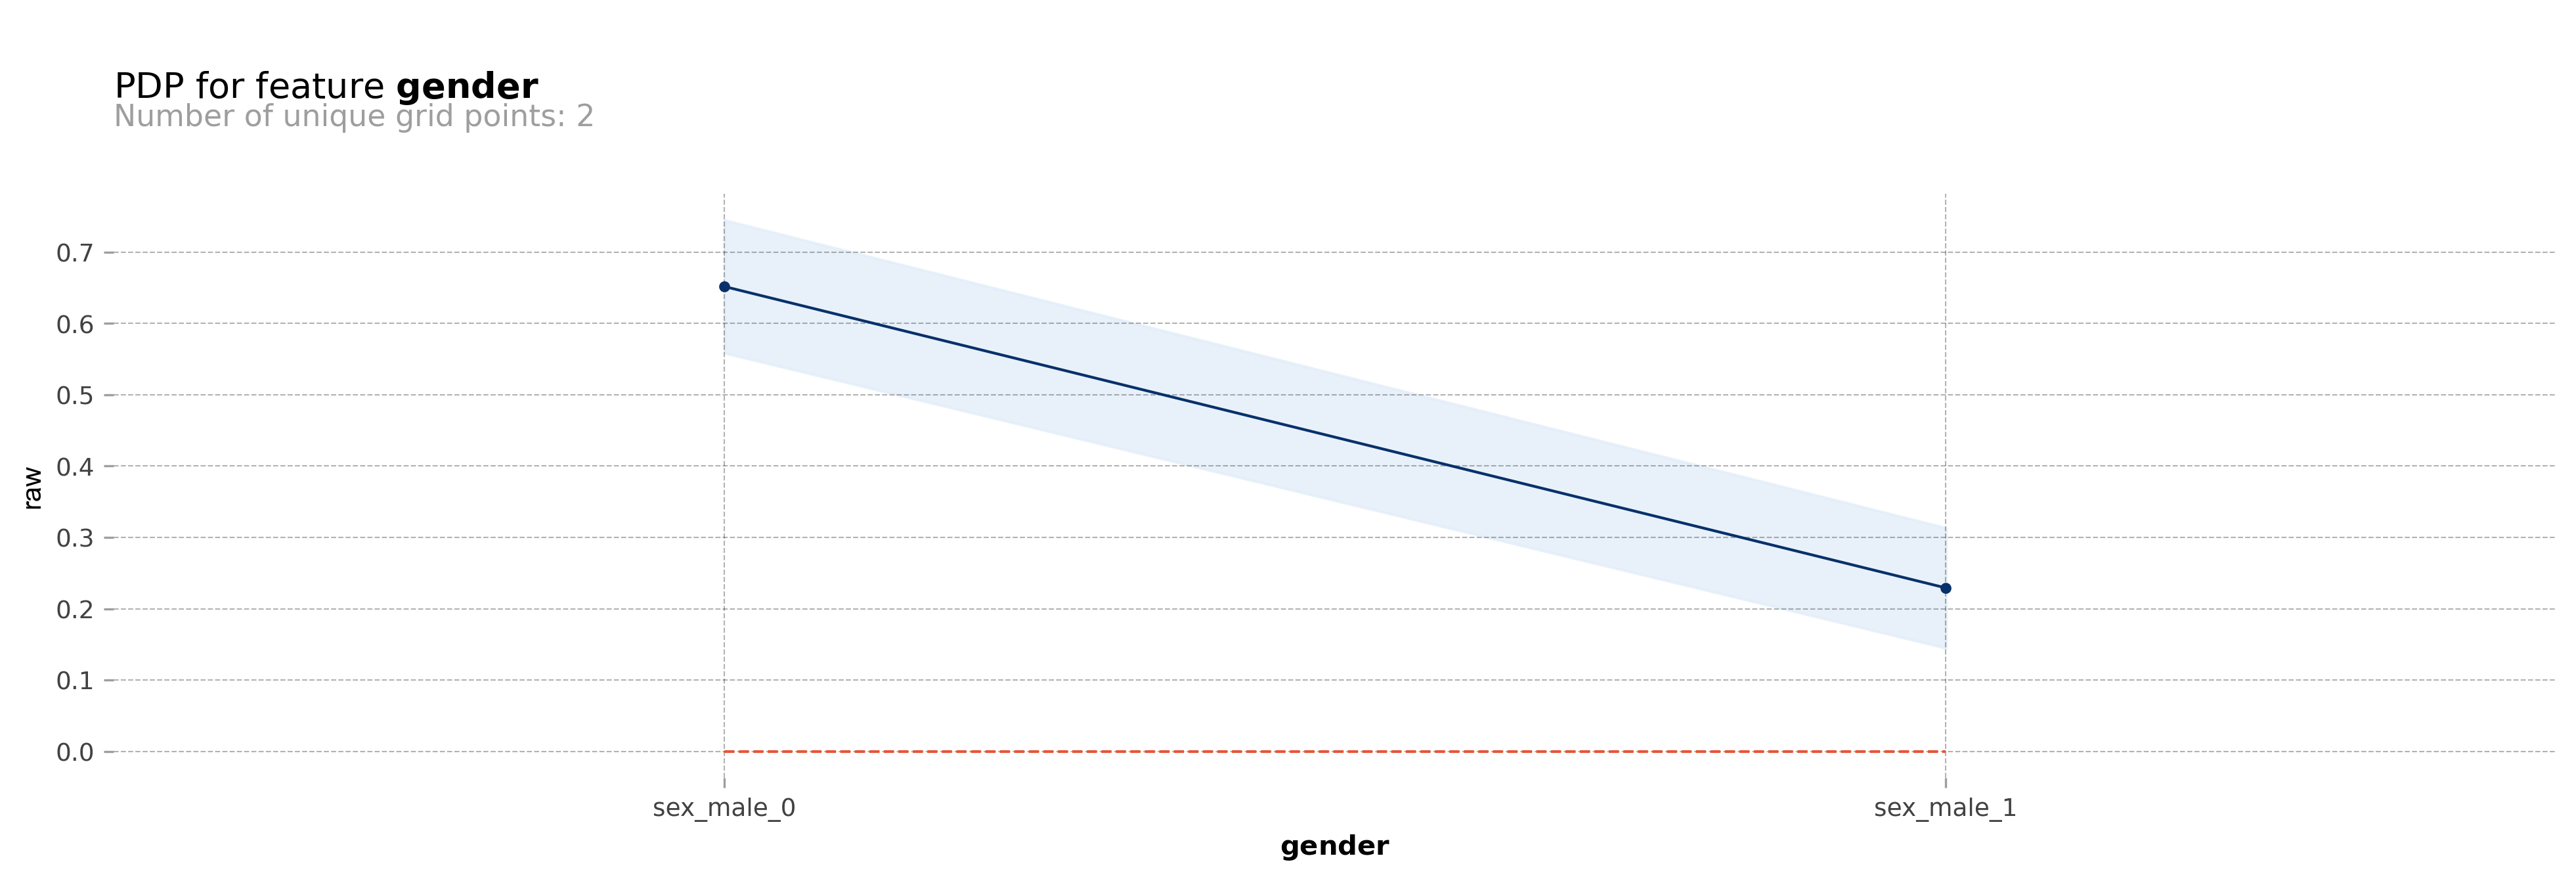

In [96]:
fig, axes = pdp_sex_female.plot(
    center=False,
    plot_lines=False,
    plot_pts_dist=False,
    to_bins=False,
    engine='matplotlib',
)
fig.set_figheight(5)
fig

In [97]:
# fig, axes = pdp_fare.plot(
#     center=True,
#     plot_lines=False, 
#     show_percentile=True,
#     plot_pts_dist=True,
#     to_bins=True, 
#     engine='matplotlib', 
# )
# fig.set_figheight(6)


obtain pred_func from the provided model.


  0%|          | 0/8 [00:00<?, ?it/s]

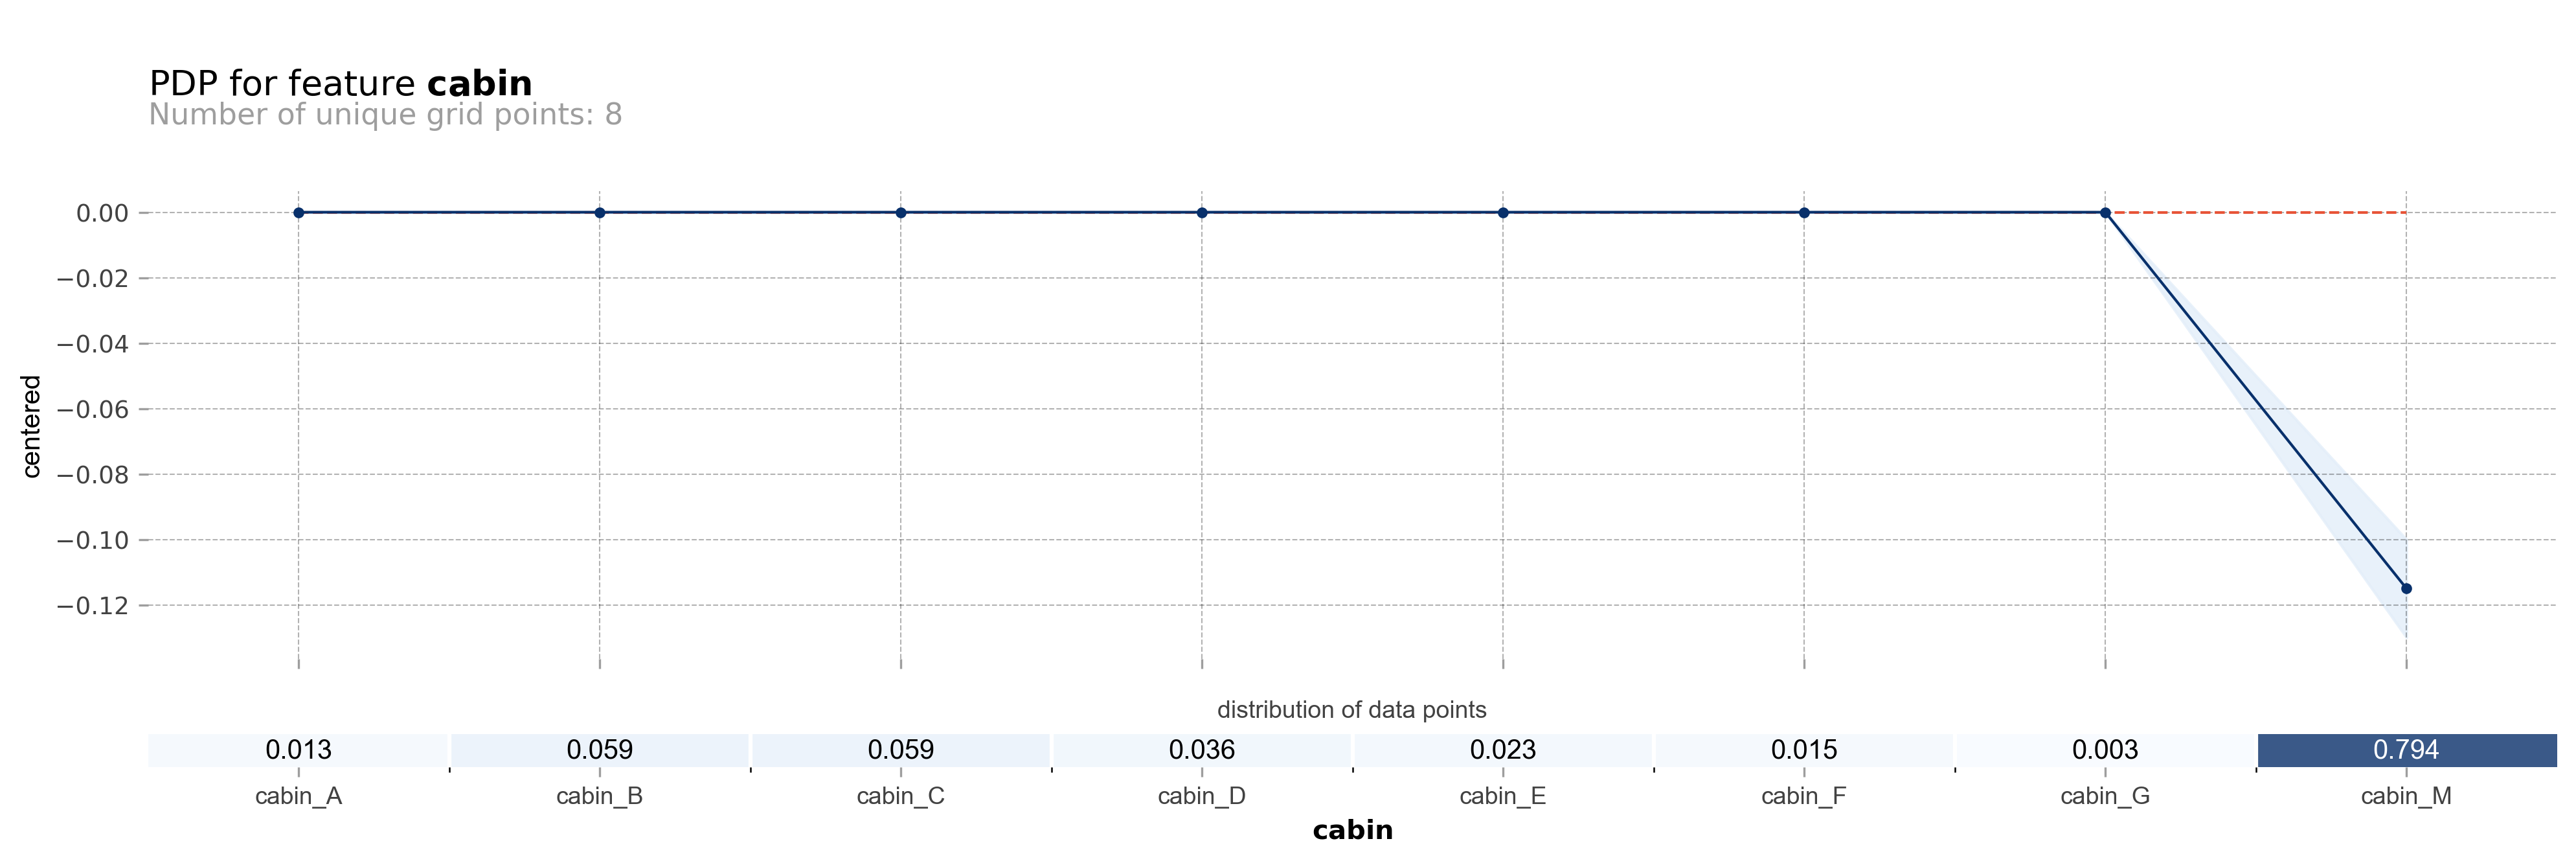

In [95]:
cabin_features = sorted([c for c in X_test if c.startswith('cabin_')])
pdp_cabin = pdp.PDPIsolate(
    model=xgbc,
    df=pd.concat([X_test, y_test], axis=1),
    model_features=X_test.columns,
    feature=cabin_features, # we set all the OHE features that correspond to cabin here
    feature_name="cabin", # we can set the name of the main variable here (before pre-processing)
)
fig, axes = pdp_cabin.plot(
    center=True,
    plot_lines=False,
    plot_pts_dist=True, 
    to_bins=False,
    engine='matplotlib',
);
fig.set_figheight(5)
fig